### Este notebook é uma análise detalhada dos dados de veículos elétricos, focando em oferecer insights para especialistas em Data Science e contribuir para a discussão sobre sustentabilidade no transporte.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Consulta: acessando informações de um banco de dados

In [2]:
# SQLite veritabanı bağlantısını oluşturun
conn = sqlite3.connect('cars.db')  

In [3]:
# Veri setini okuyun ve SQLite veritabanına aktarın
data = pd.read_csv('/kaggle/input/electric-vehicle-specifications-and-prices/EV_cars.csv')
data.to_sql('cars', conn, if_exists='replace', index=False)

360

In [4]:
# SQL sorguları

#Tüm tabloya göz atalım
query = "Select * From cars"
tables = pd.read_sql(query, conn)
tables

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3


In [5]:
# Veri kümesindeki farklı araba adlarını bulun
query1 = "SELECT DISTINCT car_name from cars"
tables1 = pd.read_sql(query1, conn)
tables1

,Car_name
0,Tesla Model Y Long Range Dual Motor
1,Tesla Model 3
2,BYD ATTO 3
3,MG MG4 Electric 64 kWh
4,Tesla Model 3 Long Range Dual Motor
...,...
346,Citroen e-Jumpy Combi XL 50 kWh
347,Fiat E-Ulysse L2 50 kWh
348,Opel Vivaro-e Combi L 50 kWh
349,Opel Zafira-e Life M 75 kWh


In [6]:
# Ortalama pil kapasitesini hesaplayın
query2 = "SELECT avg(battery) as avg_battery_capacity from cars"
tables2 = pd.read_sql(query2, conn)
tables2

,avg_battery_capacity
0,71.1875


In [7]:
# Arabaların maksimum ve minimum menzilini belirleyin
query3 = "SELECT max(`Range`) as max_range, min(`Range`) as min_range from cars"
tables3 = pd.read_sql(query3, conn)
tables3

,max_range,min_range
0,685,135


In [8]:
# En yüksek hıza sahip arabayı bulun
query4 = "SELECT Car_name, Top_speed from cars order by Top_speed DESC LIMIT 1;"
tables4 = pd.read_sql(query4, conn)
tables4

,Car_name,Top_speed
0,Maserati GranTurismo Folgore,320


In [9]:
# BATARYA İNCELEMESİ:

# Veri kümesini pil kapasitesine göre azalan sırada sıralayın
query5 = "SELECT Car_name, `Price.DE.`, Battery from cars order by Battery DESC"
tables5 = pd.read_sql(query5, conn)
tables5

,Car_name,Price.DE.,Battery
0,VinFast VF 9 Extended Range,89790.0,123.0
1,Lucid Air Dream Edition R,218000.0,118.0
2,Lucid Air Dream Edition P,218000.0,118.0
3,Lucid Air Grand Touring,159000.0,112.0
4,Lotus Eletre,95990.0,109.0
...,...,...,...
355,Dacia Spring Electric 65 Extreme,24550.0,25.0
356,Renault Twingo Electric,28000.0,21.3
357,Fiat 500e Hatchback 24 kWh,30990.0,21.3
358,Fiat 500e 3+1 24 kWh,NaN,21.3


In [10]:
# En yüksek pil kapasitesine sahip aracı bulun:
query6 = "SELECT Car_name, Battery from cars where Battery = (select max(Battery) from cars); "
tables6 = pd.read_sql(query6, conn)
tables6

,Car_name,Battery
0,VinFast VF 9 Extended Range,123.0


In [11]:
# En düşük pil kapasitesine sahip aracı bulun
query7 = "SELECT Car_name, Battery from cars where Battery = (select min(Battery) from cars);"
tables7 = pd.read_sql(query7, conn)
tables7

,Car_name,Battery
0,Renault Twingo Electric,21.3
1,Fiat 500e Hatchback 24 kWh,21.3
2,Fiat 500e 3+1 24 kWh,21.3
3,Fiat 500e Cabrio 24 kWh,21.3


In [12]:
#İki spesifik araba arasındaki pil kapasitelerini karşılaştırın
query8 = "SELECT Car_name, Battery FROM cars WHERE Car_name IN ('Tesla Model Y Long Range Dual Motor', 'Tesla Model 3');"
tables8 = pd.read_sql(query8, conn)
tables8

,Car_name,Battery
0,Tesla Model Y Long Range Dual Motor,75.0
1,Tesla Model 3,57.5


In [13]:
# Veri kümesini verimliliğe göre azalan düzende sıralayın
query9 = "SELECT Car_name, Battery,Efficiency FROM cars order by Efficiency DESC; "
tables9 = pd.read_sql(query9, conn)
tables9

,Car_name,Battery,Efficiency
0,Mercedes eVito Tourer Extra-Long 90 kWh,90.0,295
1,Mercedes eVito Tourer Extra-Long 60 kWh,60.0,293
2,Mercedes EQV 300 Long,90.0,290
3,Mercedes eVito Tourer Long 90 kWh,90.0,290
4,Mercedes EQV 300 Extra-Long,90.0,290
...,...,...,...
355,Dacia Spring Electric 45,25.0,152
356,Tesla Model 3 Long Range Dual Motor,75.0,149
357,Hyundai IONIQ 6 Long Range 2WD,74.0,149
358,Hyundai IONIQ 6 Standard Range 2WD,54.0,148


In [14]:
#En yüksek verimliliğe sahip arabayı bulun
query10 = "SELECT Car_name, Battery,Efficiency FROM cars where Efficiency = (Select max(Efficiency) from cars); "
tables10 = pd.read_sql(query10, conn)
tables10

,Car_name,Battery,Efficiency
0,Mercedes eVito Tourer Extra-Long 90 kWh,90.0,295


In [15]:
#İki spesifik arabanın verimliliğini karşılaştırın
query11 = "SELECT Car_name, Battery,Efficiency FROM cars where Car_name IN ('Tesla Model Y Long Range Dual Motor' , 'BYD ATTO 3');  "
tables11 = pd.read_sql(query11, conn)
tables11

,Car_name,Battery,Efficiency
0,Tesla Model Y Long Range Dual Motor,75.0,172
1,BYD ATTO 3,60.5,183


In [16]:
# Hızlı şarj değerlerini bakalım. buradaki değerler km/saat
query12 = "SELECT Car_name, Battery, `Price.DE.`, Efficiency, Fast_charge FROM cars order by Fast_charge DESC; "
tables12 = pd.read_sql(query12, conn)
tables12

,Car_name,Battery,Price.DE.,Efficiency,Fast_charge
0,Hyundai IONIQ 6 Long Range 2WD,74.0,54000.0,149,1290.0
1,Porsche Taycan Plus,83.7,98863.0,173,1190.0
2,Porsche Taycan 4S Plus,83.7,120081.0,174,1180.0
3,Hyundai IONIQ 6 Long Range AWD,74.0,61100.0,168,1150.0
4,Porsche Taycan GTS,83.7,139906.0,186,1110.0
...,...,...,...,...,...
355,Honda e Advance,28.5,39900.0,168,180.0
356,Dacia Spring Electric 65 Extreme,25.0,24550.0,156,170.0
357,Lexus UX 300e,64.0,NaN,188,170.0
358,Renault Twingo Electric,21.3,28000.0,158,NaN


In [17]:
# En yüksek hızlı şarj değeri olan araç
query13 = "SELECT Car_name, Battery, `Price.DE.`, Efficiency, Fast_charge FROM cars where Fast_charge = (select max(Fast_charge) from cars);  "
tables13 = pd.read_sql(query13, conn)
tables13

,Car_name,Battery,Price.DE.,Efficiency,Fast_charge
0,Hyundai IONIQ 6 Long Range 2WD,74.0,54000.0,149,1290.0


In [18]:
#  İki spesifik araba arasındaki hızlı şarj kapasitelerini karşılaştırın
query14 = "SELECT Car_name, Battery, `Price.DE.`, Efficiency, Fast_charge FROM cars where Car_name IN ('Tesla Model Y Long Range Dual Motor', 'BYD ATTO 3');"
tables14 = pd.read_sql(query14, conn)
tables14

,Car_name,Battery,Price.DE.,Efficiency,Fast_charge
0,Tesla Model Y Long Range Dual Motor,75.0,59017.0,172,670.0
1,BYD ATTO 3,60.5,44625.0,183,370.0


In [19]:
# FİYAT ANALİZİ

#  Veri kümesini fiyata göre azalan sırada sıralayın

query15 = "SELECT * FROM cars order by `Price.DE.` DESC;"
tables15 = pd.read_sql(query15, conn)
tables15

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,118.0,Lucid Air Dream Edition R,https://ev-database.org/car/1696/Lucid-Air-Dre...,172,870.0,218000.0,685,270,2.9
1,118.0,Lucid Air Dream Edition P,https://ev-database.org/car/1098/Lucid-Air-Dre...,177,840.0,218000.0,665,270,2.7
2,83.7,Porsche Taycan Turbo S Cross Turismo,https://ev-database.org/car/1932/Porsche-Tayca...,204,1010.0,199168.0,410,250,2.9
3,83.7,Porsche Taycan Turbo S Sport Turismo,https://ev-database.org/car/1626/Porsche-Tayca...,212,970.0,198692.0,395,260,2.8
4,83.7,Porsche Taycan Turbo S,https://ev-database.org/car/1928/Porsche-Tayca...,195,1060.0,197740.0,430,260,2.8
...,...,...,...,...,...,...,...,...,...
355,28.9,Mini Cooper SE Convertible,https://ev-database.org/car/1827/Mini-Cooper-S...,175,230.0,NaN,165,150,8.2
356,68.0,Toyota PROACE Shuttle M 75 kWh,https://ev-database.org/car/1611/Toyota-PROACE...,257,290.0,NaN,265,130,13.1
357,46.3,Toyota PROACE Shuttle L 50 kWh,https://ev-database.org/car/1610/Toyota-PROACE...,257,290.0,NaN,180,130,12.1
358,68.0,Toyota PROACE Shuttle L 75 kWh,https://ev-database.org/car/1612/Toyota-PROACE...,262,280.0,NaN,260,130,13.1


In [20]:
# En yüksek fiyatlı araçlar
query16 = "SELECT Car_name, `Price.DE.` FROM cars where `Price.DE.` = (select max(`Price.DE.`) from cars);"
tables16 = pd.read_sql(query16, conn)
tables16

,Car_name,Price.DE.
0,Lucid Air Dream Edition R,218000.0
1,Lucid Air Dream Edition P,218000.0


In [21]:
# En Düşük Fiyatlı EV araç
query17 = "SELECT Car_name, `Price.DE.` FROM cars where `Price.DE.` = (select min(`Price.DE.`) from cars);"
tables17 = pd.read_sql(query17, conn)
tables17

,Car_name,Price.DE.
0,Dacia Spring Electric 45,22550.0


In [22]:
#En Düşük Fiyatlı EV araç
query18 = "SELECT Car_name, `Price.DE.` FROM cars where `Price.DE.` = (select min(`Price.DE.`) from cars); "
tables18 = pd.read_sql(query18, conn)
tables18

,Car_name,Price.DE.
0,Dacia Spring Electric 45,22550.0


In [23]:
# Ortalama fiyatı hesaplayın
query19 = "SELECT avg(`Price.DE.`) as avg_price FROM cars"
tables19 = pd.read_sql(query19, conn)
tables19

,avg_price
0,67264.28479


In [24]:
# TOP SPEED VE HIZLANMA

# En yüksek hız sıralaması
query20 = "SELECT Car_name, `Price.DE.`, Top_Speed FROM cars order by Top_speed DESC;"
tables20 = pd.read_sql(query20, conn)
tables20


,Car_name,Price.DE.,Top_speed
0,Maserati GranTurismo Folgore,NaN,320
1,Tesla Model S Plaid,110970.0,282
2,Lucid Air Dream Edition R,218000.0,270
3,Lucid Air Grand Touring,159000.0,270
4,Lucid Air Dream Edition P,218000.0,270
...,...,...,...
355,Opel Vivaro-e Combi L 50 kWh,51825.0,130
356,Opel Zafira-e Life M 75 kWh,69250.0,130
357,Fiat E-Ulysse L3 50 kWh,56990.0,130
358,Dacia Spring Electric 45,22550.0,125


In [25]:
# Veri kümesini hıza (0-100 km/saat) göre artan sırada sıralayın
query21 = "SELECT Car_name, `acceleration..0.100.` FROM cars order by `acceleration..0.100.` ASC;"
tables21 = pd.read_sql(query21, conn)
tables21

,Car_name,acceleration..0.100.
0,Tesla Model S Plaid,2.1
1,Tesla Model X Plaid,2.6
2,Lucid Air Dream Edition P,2.7
3,Maserati GranTurismo Folgore,2.7
4,Porsche Taycan Turbo S,2.8
...,...,...
355,Peugeot e-Expert Combi Standard 75 kWh,14.3
356,Peugeot e-Traveller Long 75 kWh,14.3
357,Peugeot e-Traveller Standard 75 kWh,14.3
358,Peugeot e-Expert Combi Long 75 kWh,14.3


In [26]:
# En yüksek hıza sahip 10 araba 
query22 = "SELECT Car_name, Top_speed FROM cars order by Top_speed DESC LIMIT 10;"
tables22 = pd.read_sql(query22, conn)
tables22

,Car_name,Top_speed
0,Maserati GranTurismo Folgore,320
1,Tesla Model S Plaid,282
2,Lucid Air Dream Edition R,270
3,Lucid Air Grand Touring,270
4,Lucid Air Dream Edition P,270
5,Tesla Model X Plaid,262
6,Kia EV6 GT,260
7,Hyundai IONIQ 5 N,260
8,Lotus Eletre R,260
9,Porsche Taycan Turbo S,260


In [27]:
# En hızlı ivmelenen 10 araç bulun (0-100 km/saat)
query23 = "SELECT Car_name, Top_speed, `acceleration..0.100.` FROM cars order by `acceleration..0.100.` ASC LIMIT 10;"
tables23 = pd.read_sql(query23, conn)
tables23

,Car_name,Top_speed,acceleration..0.100.
0,Tesla Model S Plaid,282,2.1
1,Tesla Model X Plaid,262,2.6
2,Lucid Air Dream Edition P,270,2.7
3,Maserati GranTurismo Folgore,320,2.7
4,Porsche Taycan Turbo S,260,2.8
5,Porsche Taycan Turbo S Sport Turismo,260,2.8
6,Lucid Air Dream Edition R,270,2.9
7,Lotus Eletre R,260,2.9
8,Porsche Taycan Turbo S Cross Turismo,250,2.9
9,Lucid Air Grand Touring,270,3.0


In [28]:
# EDA 

# Markaya göre araba sayısı
query24 = "SELECT CASE WHEN INSTR(Car_name, ' ') > 0 THEN SUBSTR(Car_name, 1, INSTR(Car_name, ' ') - 1)ELSE Car_name END as Brand, COUNT(*) as count FROM cars GROUP BY Brand order by count desc;"
tables24 = pd.read_sql(query24, conn)
tables24


,Brand,count
0,Mercedes,45
1,Peugeot,20
2,Porsche,18
3,Audi,18
4,Opel,16
5,Citroen,15
6,BMW,15
7,Volvo,12
8,Volkswagen,11
9,Hyundai,11


In [29]:
#Markaya göre ortalama menzil hesaplayın
query25 = "SELECT CASE WHEN INSTR(Car_name, ' ') > 0 THEN SUBSTR(Car_name, 1, INSTR(Car_name, ' ') - 1) ELSE Car_name END AS Brand, AVG(`Range`) AS avg_range  FROM cars GROUP BY Brand order by avg_range desc;"
tables25 = pd.read_sql(query25, conn)
tables25

,Brand,avg_range
0,Lucid,637.000000
1,Fisker,493.750000
2,Lotus,475.000000
3,XPENG,464.166667
4,Polestar,461.875000
5,VinFast,456.666667
6,Rolls-Royce,455.000000
7,Tesla,454.000000
8,Zeekr,449.000000
9,BMW,446.666667


In [30]:
# Markaya göre ortalama verimliliği hesaplayın
query26 = "SELECT CASE WHEN INSTR(Car_name, ' ') > 0 THEN SUBSTR(Car_name, 1, INSTR(Car_name, ' ') - 1) ELSE Car_name END AS Brand, AVG(Efficiency) AS avg_efficiency FROM cars GROUP BY Brand order by avg_efficiency desc;"
tables26 = pd.read_sql(query26, conn)
tables26

,Brand,avg_efficiency
0,Hongqi,241.000000
1,Toyota,238.200000
2,Maxus,230.000000
3,Lotus,230.000000
4,Jaguar,223.000000
5,Citroen,220.666667
6,Rolls-Royce,220.000000
7,Opel,218.187500
8,VinFast,216.333333
9,Maserati,215.000000


In [31]:
# Ortalama fiyatı markaya göre hesaplayın 
query27 = "SELECT CASE WHEN INSTR(Car_name, ' ') > 0 THEN SUBSTR(Car_name, 1, INSTR(Car_name, ' ') - 1) ELSE Car_name END AS Brand, AVG(`Price.DE.`) AS avg_price FROM cars GROUP BY Brand order by avg_price desc;"
tables27 = pd.read_sql(query27, conn)
tables27

,Brand,avg_price
0,Lucid,166600.000000
1,Porsche,136131.111111
2,Lotus,123490.000000
3,Jaguar,92400.000000
4,BMW,88920.000000
5,Mercedes,87373.621622
6,Audi,79260.714286
7,NIO,74960.000000
8,Tesla,74313.800000
9,Maxus,68990.000000


In [32]:
#Markaya göre araba sayısı TOP 10
query28 = "SELECT CASE WHEN INSTR(Car_name, ' ') > 0 THEN SUBSTR(Car_name, 1, INSTR(Car_name, ' ') - 1)ELSE Car_name END as Brand, COUNT(*) as count FROM cars GROUP BY Brand order by count desc LIMIT 10;"
tables28 = pd.read_sql(query28, conn)
tables28


,Brand,count
0,Mercedes,45
1,Peugeot,20
2,Porsche,18
3,Audi,18
4,Opel,16
5,Citroen,15
6,BMW,15
7,Volvo,12
8,Volkswagen,11
9,Hyundai,11


In [33]:
#Araçları fiyata göre azalan düzende sıralayın ve ilk 10 ile sınırlandırın
query29 = "SELECT Car_name, `Price.DE.`  FROM cars order by `Price.DE.` DESC LIMIT 10; "
tables29 = pd.read_sql(query29, conn)
tables29

,Car_name,Price.DE.
0,Lucid Air Dream Edition R,218000.0
1,Lucid Air Dream Edition P,218000.0
2,Porsche Taycan Turbo S Cross Turismo,199168.0
3,Porsche Taycan Turbo S Sport Turismo,198692.0
4,Porsche Taycan Turbo S,197740.0
5,BMW i7 M70 xDrive,181800.0
6,Porsche Taycan Turbo Cross Turismo,165848.0
7,Porsche Taycan Turbo Sport Turismo,165372.0
8,Porsche Taycan Turbo,164420.0
9,Lucid Air Grand Touring,159000.0


In [34]:
#Markaları ortalama menzile göre azalan düzende sıralayın ve ilk 10 ile sınırlandırın:
query30 = "SELECT Car_name as Brand, avg(`Range`) as avg_range FROM cars group by brand order by avg_range DESC LIMIT 10; "
tables30 = pd.read_sql(query30, conn)
tables30

,Brand,avg_range
0,Lucid Air Dream Edition R,685.0
1,Lucid Air Grand Touring,665.0
2,Lucid Air Dream Edition P,665.0
3,Mercedes EQS 450+,635.0
4,Mercedes EQS 450 4MATIC,610.0
5,Mercedes EQS 580 4MATIC,590.0
6,Mercedes EQS 500 4MATIC,590.0
7,Lucid Air Pure AWD,590.0
8,Lucid Air Touring,580.0
9,Tesla Model S Dual Motor,575.0


In [35]:
# Araçları verimliliğe göre azalan düzende sıralayın ve ilk 10 ile sınırlandırın:
query31 = "SELECT Car_name, Efficiency FROM cars order by Efficiency DESC LIMIT 10;"
tables31 = pd.read_sql(query31, conn)
tables31

,Car_name,Efficiency
0,Mercedes eVito Tourer Extra-Long 90 kWh,295
1,Mercedes eVito Tourer Extra-Long 60 kWh,293
2,Mercedes EQV 300 Long,290
3,Mercedes eVito Tourer Long 90 kWh,290
4,Mercedes EQV 300 Extra-Long,290
5,Mercedes EQV 250 Long,286
6,Mercedes eVito Tourer Long 60 kWh,286
7,Mercedes EQV 250 Extra-Long,286
8,Opel Zafira-e Life L 75 kWh,262
9,Toyota PROACE Verso L 75 kWh,262


In [36]:
# FİYAT PERFOREMANS ANALİZİ 

# Pil kapasitesi, fiyat, hızlanma, maksimum hız, verimlilik gibi birden fazla parametreyi dikkate alarak kapsamlı bir fiyat/performans analizi yapmak isterseniz genel fiyat/performans oranını hesaplamak için.

query32 = "SELECT Car_name, ((Battery + Top_speed) / `Price.DE.`) * (1 / `acceleration..0.100.`) * Efficiency AS price_performance_ratio FROM cars ORDER BY price_performance_ratio DESC ;"
tables32 = pd.read_sql(query32, conn)
tables32

,Car_name,price_performance_ratio
0,MG MG4 Electric XPOWER,0.282860
1,Tesla Model S Plaid,0.275021
2,Kia EV6 GT,0.269328
3,Smart #1 Pulse,0.258936
4,Fisker Ocean Ultra,0.254777
...,...,...
355,Mini Cooper SE Convertible,NaN
356,Toyota PROACE Shuttle M 75 kWh,NaN
357,Toyota PROACE Shuttle L 50 kWh,NaN
358,Toyota PROACE Shuttle L 75 kWh,NaN


In [37]:
#FİYAT PERFOREMANS TOP 10 
query33 = "SELECT Car_name, ((Battery + Top_speed) / `Price.DE.`) * (1 / `acceleration..0.100.`) * Efficiency AS price_performance_ratio FROM cars ORDER BY price_performance_ratio DESC LIMIT 10;"
tables33 = pd.read_sql(query33, conn)
tables33


,Car_name,price_performance_ratio
0,MG MG4 Electric XPOWER,0.282860
1,Tesla Model S Plaid,0.275021
2,Kia EV6 GT,0.269328
3,Smart #1 Pulse,0.258936
4,Fisker Ocean Ultra,0.254777
5,Tesla Model Y Performance,0.249716
6,Smart #1 Brabus,0.249522
7,Volvo EX30 Twin Motor Performance,0.248803
8,Tesla Model X Plaid,0.247455
9,Smart #3 Brabus,0.241150


### 2. Adicionando dataset e carregando dados utilizando Pandas

In [38]:
# Caminho do arquivo
file_path = '/kaggle/input/electric-vehicle-specifications-and-prices/EV_cars.csv' 

# Carregando os dados
ev_data = pd.read_csv(file_path)

# Visualizando as primeiras linhas do dataframe
ev_data.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


### 3. EDA ou Análise Exploratória de Dados

In [39]:
# a. Visão Geral dos Dados
print("Tamanho do dataset:", ev_data.shape)
print("\nPrimeiras linhas do dataset:")
print(ev_data.head())
print("\nÚltimas linhas do dataset:")
print(ev_data.tail())

Tamanho do dataset: (360, 9)

Primeiras linhas do dataset:
   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201       

In [40]:
# b. Estatísticas Descritivas
print("\nResumo estatístico dos dados numéricos:")
print(ev_data.describe())
print("\nTipos de dados:")
print(ev_data.dtypes)


Resumo estatístico dos dados numéricos:
          Battery  Efficiency  Fast_charge      Price.DE.       Range  \
count  360.000000  360.000000   358.000000     309.000000  360.000000   
mean    71.187500  195.175000   552.960894   67264.284790  369.694444   
std     20.389849   31.909429   236.864801   34508.249544  107.315514   
min     21.300000  137.000000   170.000000   22550.000000  135.000000   
25%     57.500000  171.000000   360.000000   45690.000000  295.000000   
50%     71.000000  188.000000   520.000000   56942.000000  380.000000   
75%     85.000000  208.250000   680.000000   73100.000000  446.250000   
max    123.000000  295.000000  1290.000000  218000.000000  685.000000   

        Top_speed  acceleration..0.100.  
count  360.000000            360.000000  
mean   180.919444              7.288889  
std     36.232023              3.005897  
min    125.000000              2.100000  
25%    155.750000              4.900000  
50%    180.000000              6.750000  
75%    

In [41]:
# c. Análise de Valores Ausentes
print("\nValores ausentes por coluna:")
print(ev_data.isnull().sum())


Valores ausentes por coluna:
Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               51
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64


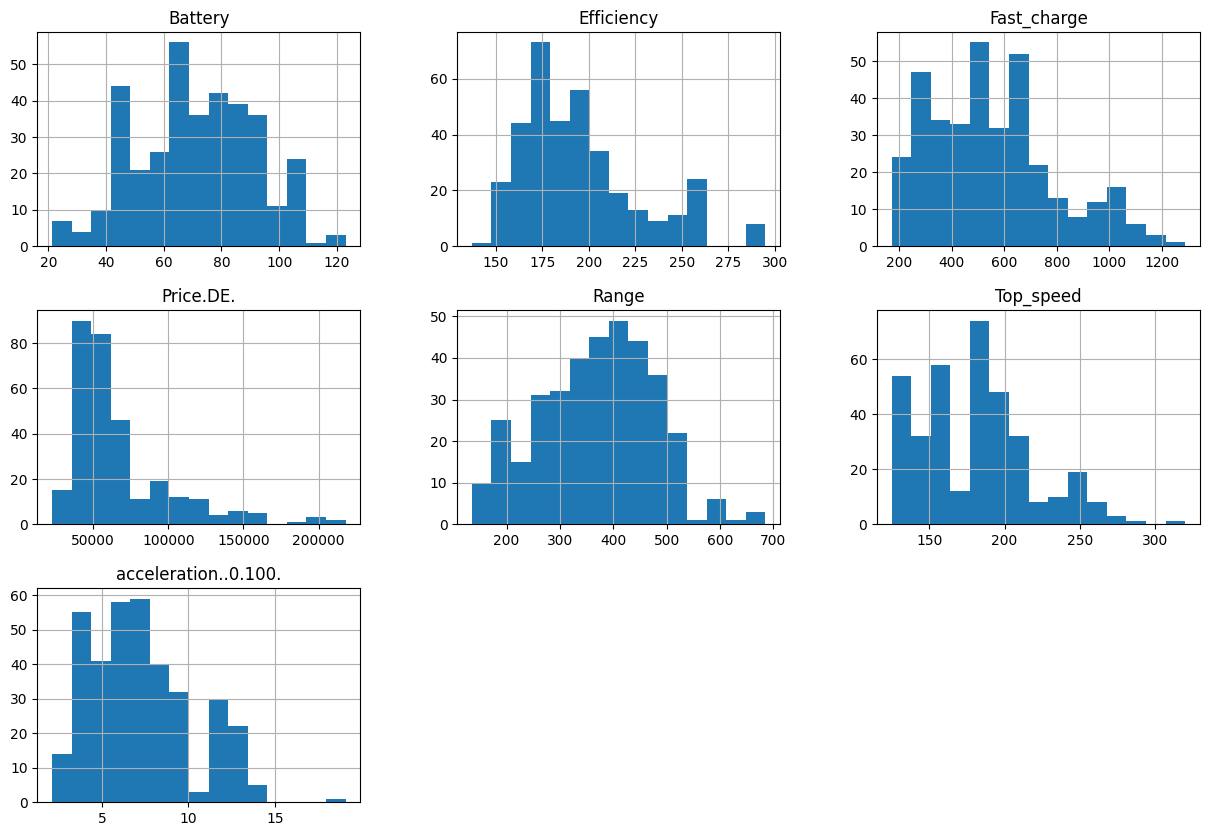

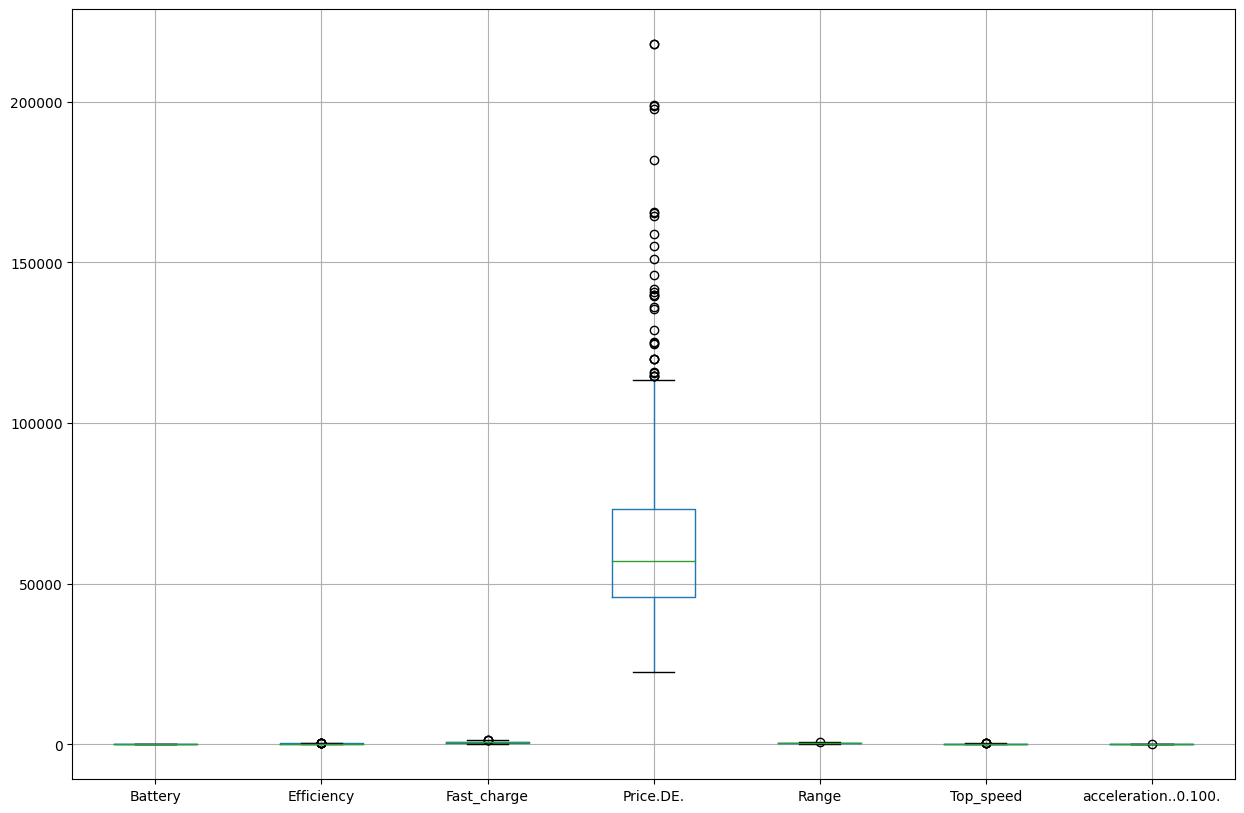

In [42]:
# d. Visualizações

# Histogramas
ev_data.hist(bins=15, figsize=(15, 10))
plt.show()

# Boxplots
ev_data.boxplot(figsize=(15, 10))
plt.show()

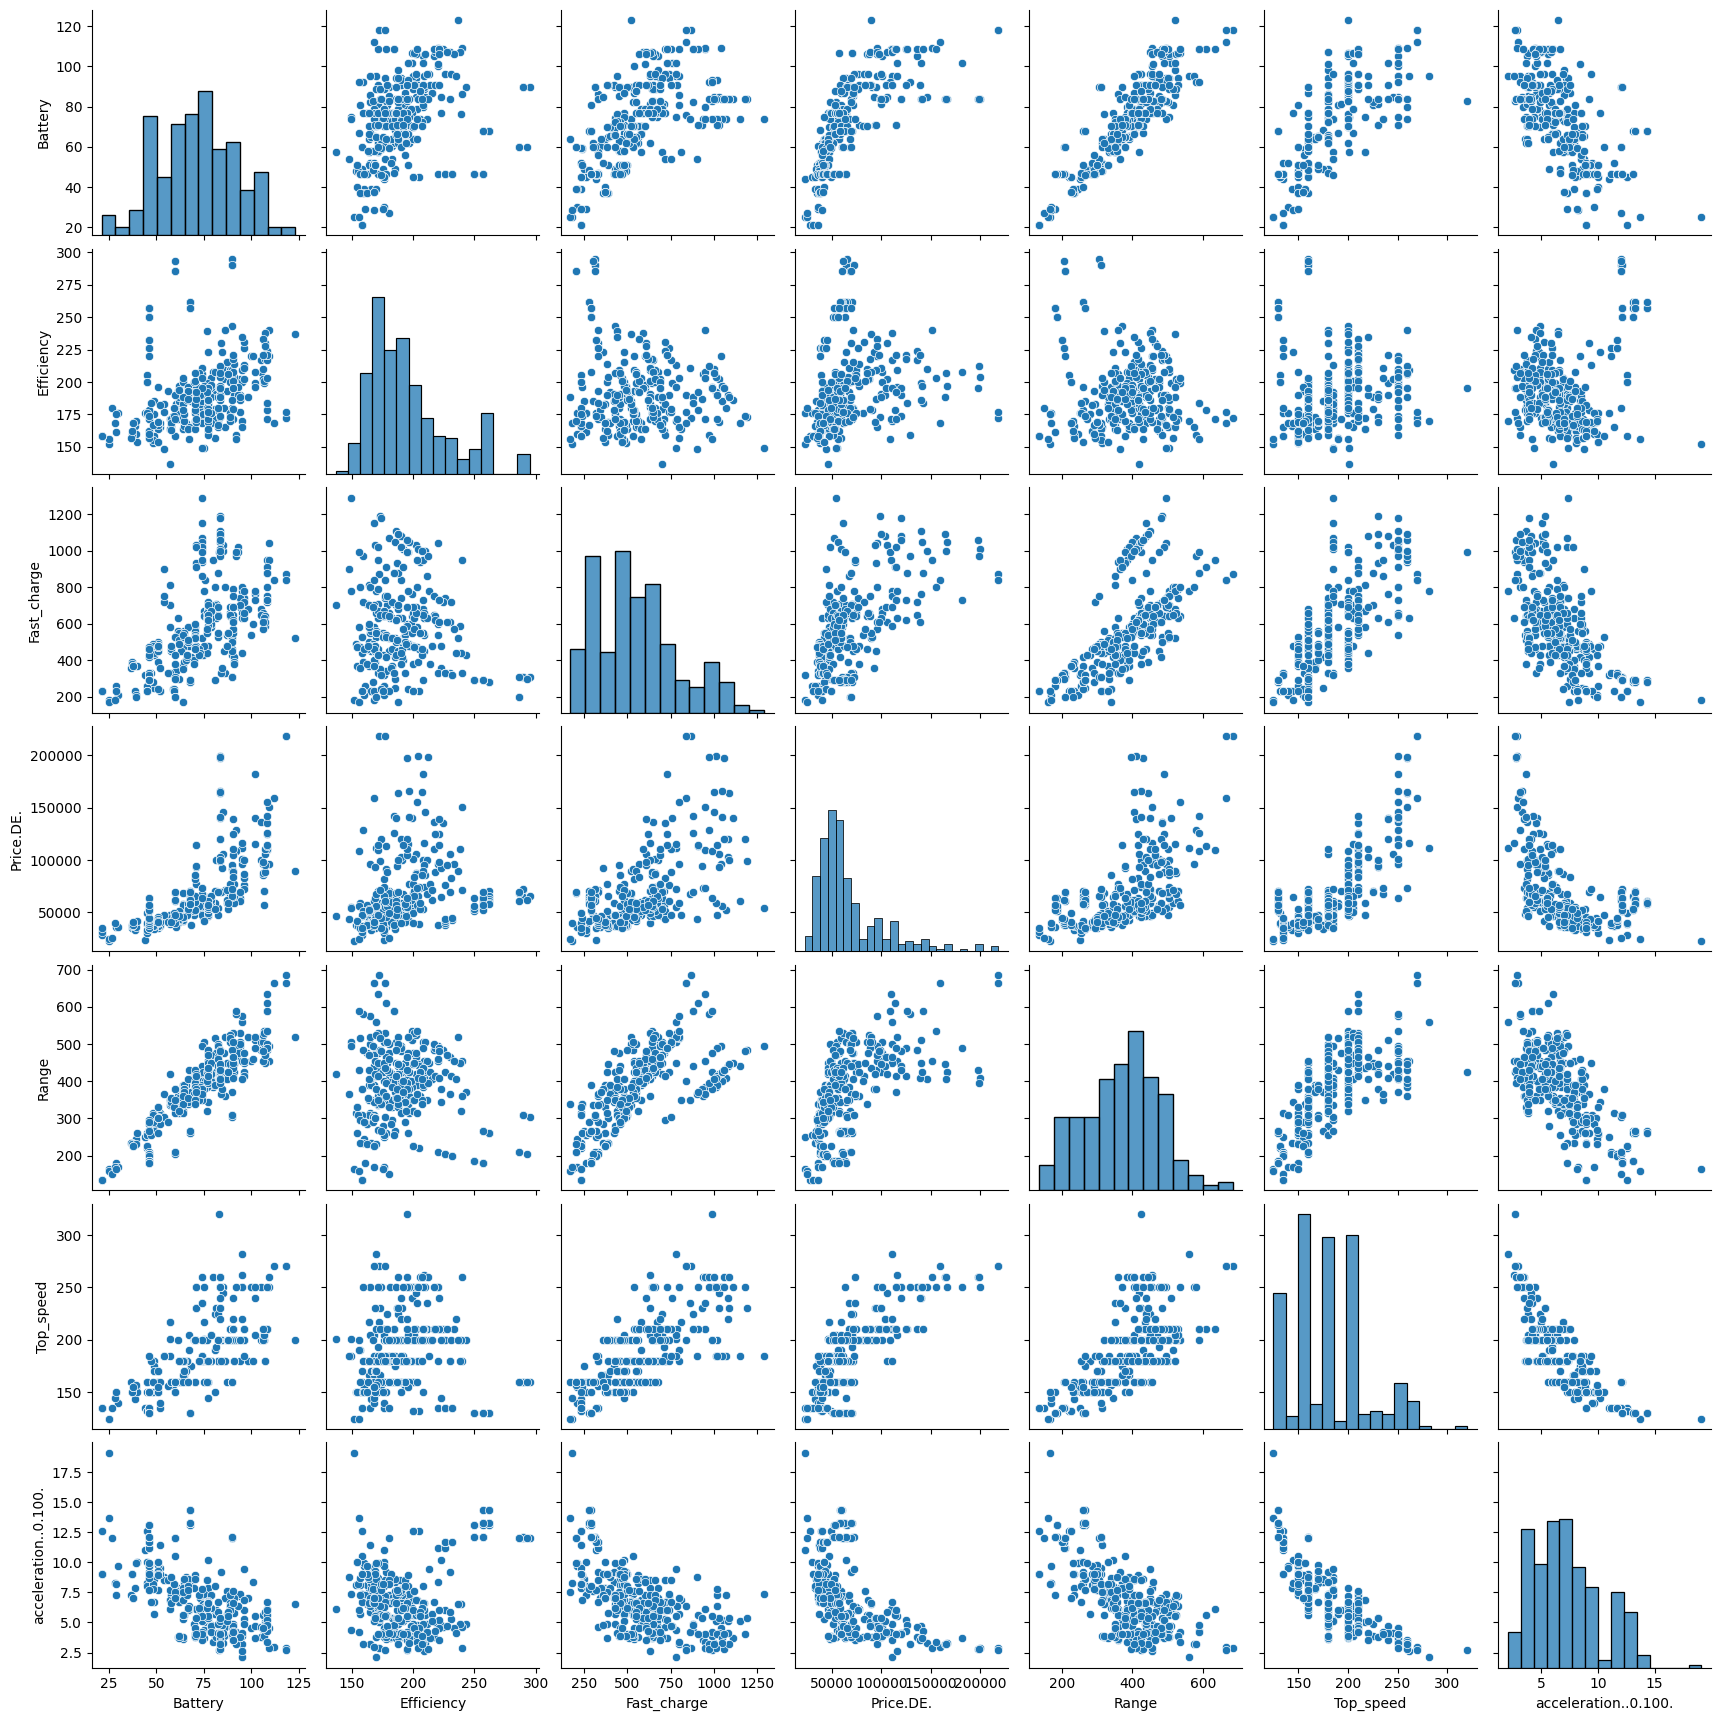

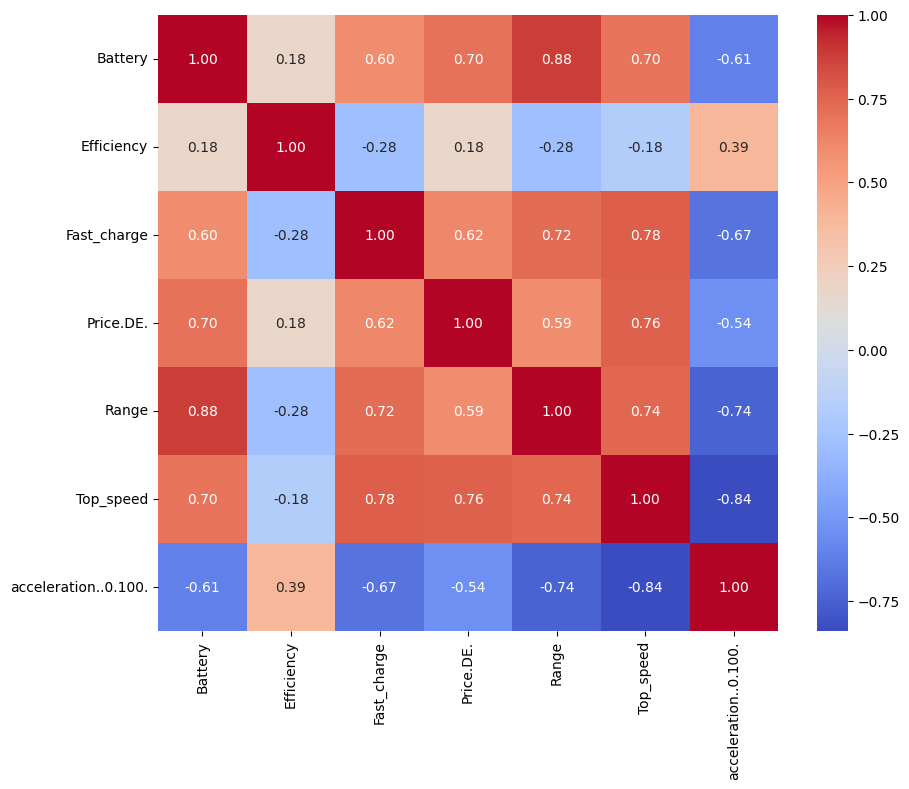

In [43]:
# e. Relações Entre Variáveis

# Gráficos de dispersão para algumas combinações de variáveis
sns.pairplot(ev_data)
plt.show()

# Selecionando apenas colunas numéricas para a matriz de correlação
numeric_data = ev_data.select_dtypes(include=[np.number])

# Matriz de correlação com apenas dados numéricos
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### 4. Visualizações Avançadas

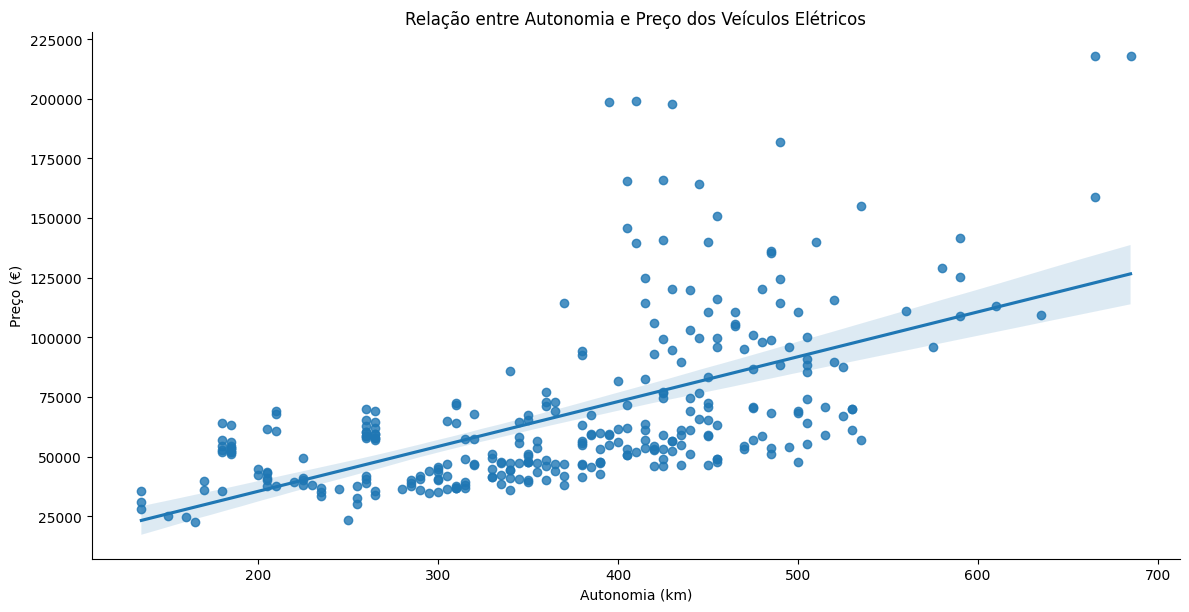

In [44]:
# a. Gráfico de dispersão com regressão linear
sns.lmplot(x='Range', y='Price.DE.', data=ev_data, aspect=2, height=6)
plt.title('Relação entre Autonomia e Preço dos Veículos Elétricos')
plt.xlabel('Autonomia (km)')
plt.ylabel('Preço (€)')
plt.show()

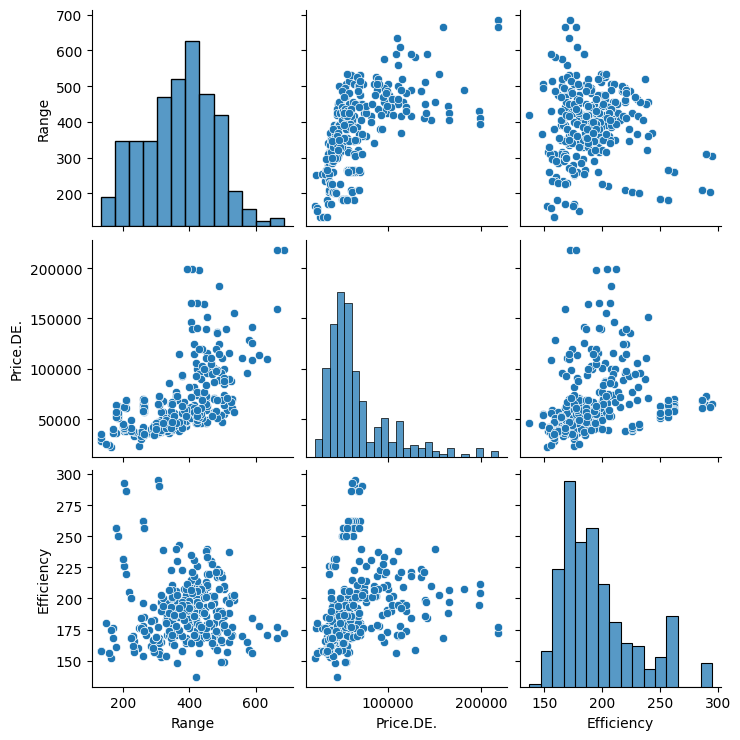

In [45]:
# b. Pairplot para algumas variáveis selecionadas
sns.pairplot(ev_data[['Range', 'Price.DE.', 'Efficiency']])
plt.show()

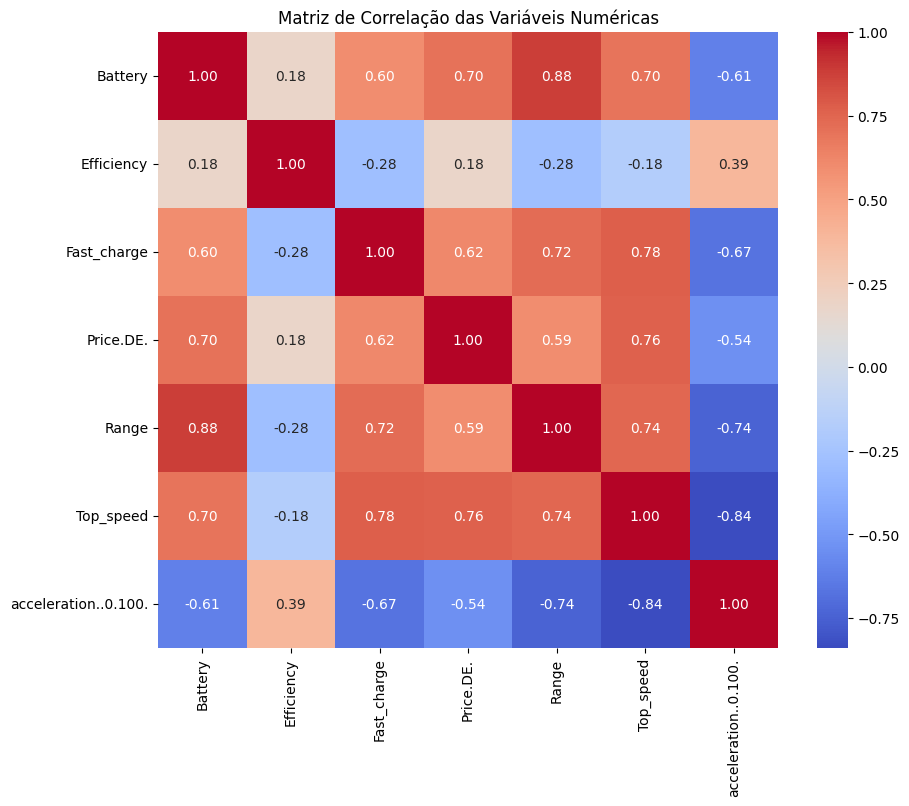

In [46]:
# c. Calculando a matriz de correlação
corr_matrix = numeric_data.corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

### 5. Comparação entre Marcas e Modelos

In [47]:
# a. Explorando as Marcas e Modelos Disponíveis no Dataset

# Listar marcas e modelos únicos
unique_brands_models = ev_data['Car_name'].unique()

print("Marcas e modelos únicos:", unique_brands_models)

Marcas e modelos únicos: ['Tesla Model Y Long Range Dual Motor' 'Tesla Model 3' 'BYD ATTO 3'
 'MG MG4 Electric 64 kWh' 'Tesla Model 3 Long Range Dual Motor'
 'Tesla Model Y' 'BMW iX xDrive40' 'Volvo EX30 Single Motor ER'
 'Citroen e-C3' 'BYD SEAL 82.5 kWh AWD Excellence' 'BMW i4 eDrive40'
 'Renault Megane E-Tech EV60 220hp' 'BMW iX1 xDrive30'
 'Hyundai Kona Electric 64 kWh' 'Tesla Model Y Performance' 'Kia Niro EV'
 'Rolls-Royce Spectre' 'Tesla Model S Plaid' 'BMW iX3'
 'Hongqi E-HS9 99 kWh' 'Fiat 500e Hatchback 42 kWh' 'BYD HAN'
 'Tesla Model S Dual Motor' 'BYD DOLPHIN 60.4 kWh'
 'CUPRA Born 150 kW - 58 kWh' 'Dacia Spring Electric 45'
 'BMW i5 eDrive40 Sedan' 'BMW i4 M50' 'Opel Astra Electric'
 'MG ZS EV Long Range' 'Audi Q4 e-tron 40' 'BMW i7 xDrive60'
 'Toyota bZ4X FWD' 'Volvo EX30 Single Motor' 'Smart #1'
 'Kia EV6 Long Range 2WD' 'Volkswagen ID.7 Pro' 'BMW iX xDrive50'
 'Audi Q8 e-tron 55 quattro' 'MG MG4 Electric 51 kWh'
 'Peugeot e-3008 73 kWh' 'BYD SEAL 82.5 kWh RWD Design' 'Sk

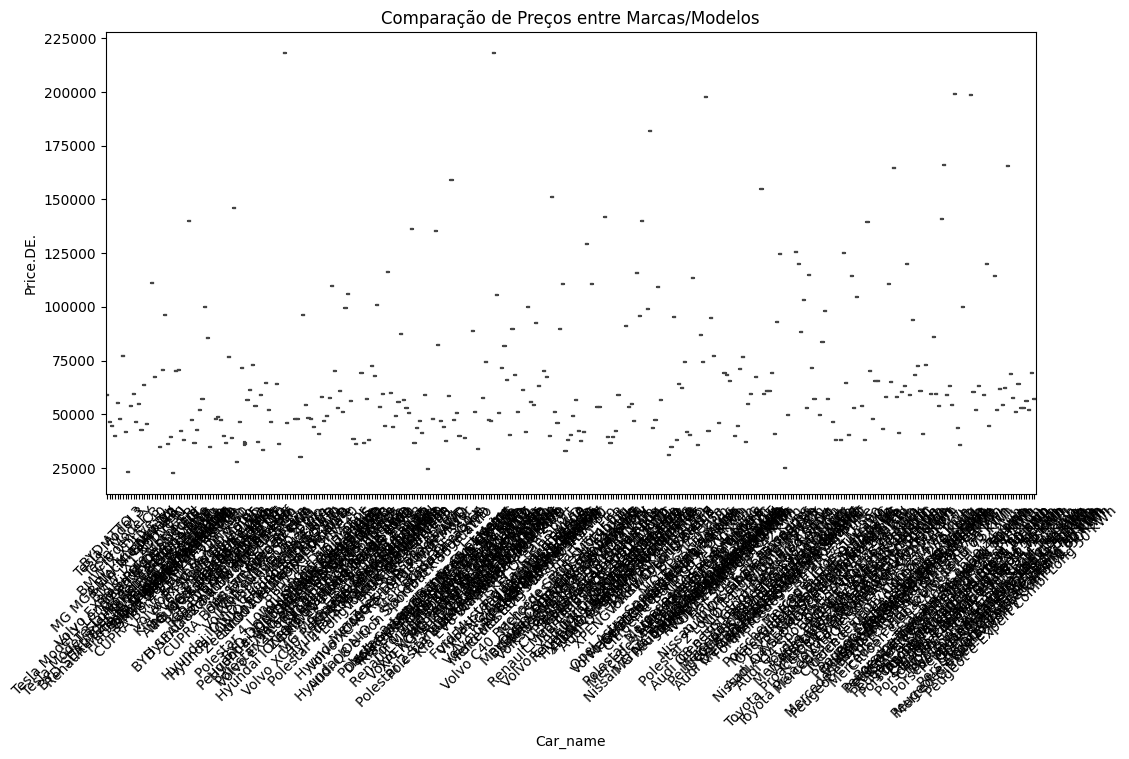

In [48]:
# b. Comparação geral de preços entre marcas/modelos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car_name', y='Price.DE.', data=ev_data)
plt.title('Comparação de Preços entre Marcas/Modelos')
plt.xticks(rotation=45)
plt.show()

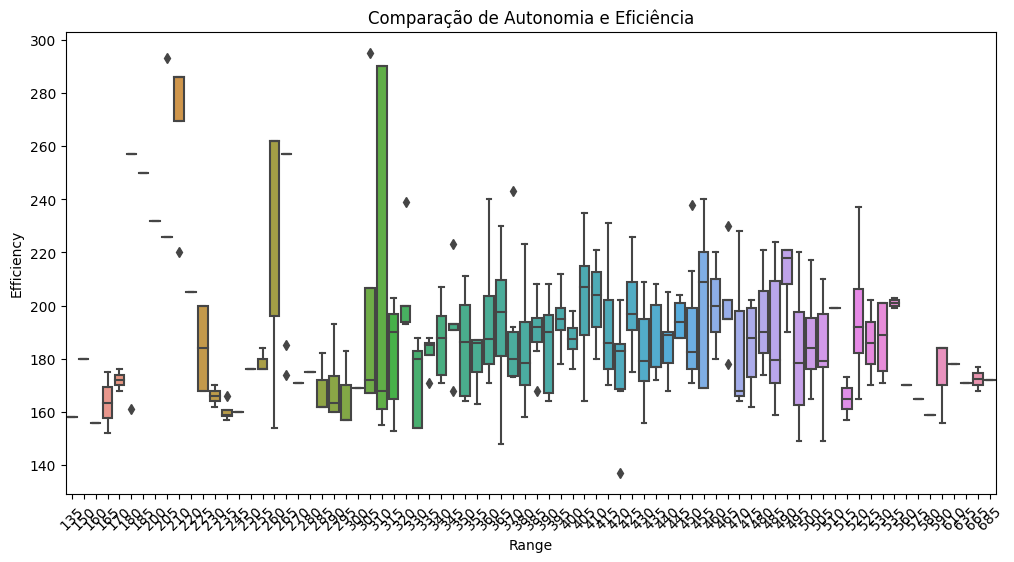

In [49]:
# c. Comparação de autonomia e eficiência
plt.figure(figsize=(12, 6))
sns.boxplot(x='Range', y='Efficiency', data=ev_data)
plt.title('Comparação de Autonomia e Eficiência')
plt.xticks(rotation=45)
plt.show()

['BYD ATTO 3' 'BYD SEAL 82.5 kWh AWD Excellence' 'BYD HAN'
 'BYD DOLPHIN 60.4 kWh' 'BYD SEAL 82.5 kWh RWD Design' 'BYD TANG'
 'BYD DOLPHIN 44.9 kWh Active' 'BYD DOLPHIN 44.9 kWh Boost']


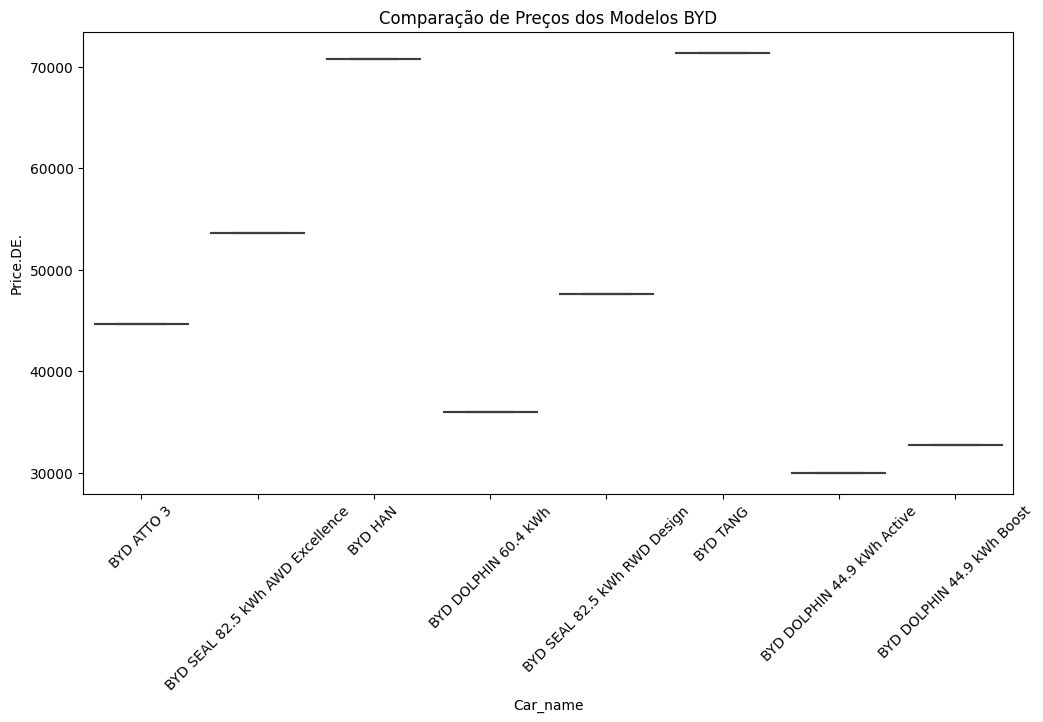

In [50]:
# c. Análise Específica da Marca BYD

# Lista de nomes de carros únicos que contêm "BYD"
byd_cars = ev_data[ev_data['Car_name'].str.contains("BYD")]['Car_name'].unique()
print(byd_cars)

# Filtrando dados da marca BYD
byd_data = ev_data[ev_data['Car_name'].str.contains("BYD")]

# Análise da marca BYD
plt.figure(figsize=(12, 6))
sns.boxplot(x='Car_name', y='Price.DE.', data=byd_data)
plt.title('Comparação de Preços dos Modelos BYD')
plt.xticks(rotation=45)
plt.show()